In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# F&B Revenue Forecast Model

## Data

In [43]:
#Loading the raw data

df_2016 = pd.read_csv("../../data/orders2016.csv", sep=";")
df_2017 = pd.read_csv("../../data/orders2017.csv", sep=";")
df_2018 = pd.read_csv("../../data/orders2018.csv", sep=";")
df_2019 = pd.read_csv("../../data/orders2019.csv", sep=";")
df_2020 = pd.read_csv("../../data/orders2020.csv", sep=";")
df_2021 = pd.read_csv("../../data/orders2021.csv", sep=";")
df_2022 = pd.read_csv("../../data/orders2022.csv", sep=";")

df_list = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

In [44]:
df_list.info()

AttributeError: 'list' object has no attribute 'info'

In [45]:
#Dropping unnecessary columns, grouping by "date", summing "item_price" to get daily revenues

for i, df in enumerate(df_list):
    df_list[i] = pd.DataFrame(df.groupby(by="date")["item_price"].sum()/100)

In [46]:
#Concat all data in one dataframe, rename the columns for prophet

df = pd.concat(df_list, ignore_index=False)
df = df.rename(columns={"date": "ds", "item_price": "y"})
df["ds"] = df.index
df = df.reset_index(drop=True)
df = df[["ds","y"]]
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1734 non-null   object 
 1   y       1734 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.2+ KB


In [47]:
df.describe()

,y
count,1734.000000
mean,671.720704
std,452.051893
min,1.500000
25%,329.575000
50%,573.100000
75%,927.025000
max,2832.900000


<Axes: xlabel='y', ylabel='Count'>

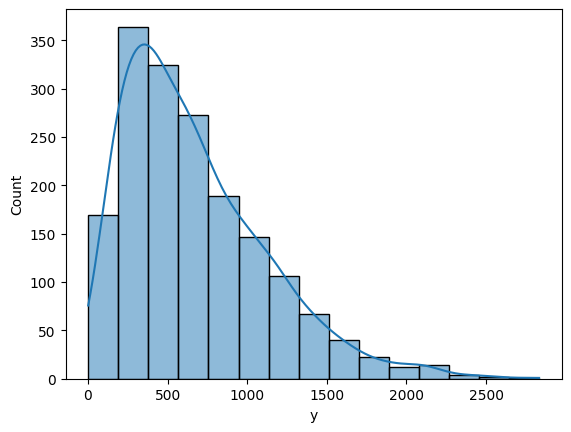

In [48]:
sns.histplot(data=df["y"],kde=True,bins=15)

<Axes: xlabel='ds', ylabel='y'>

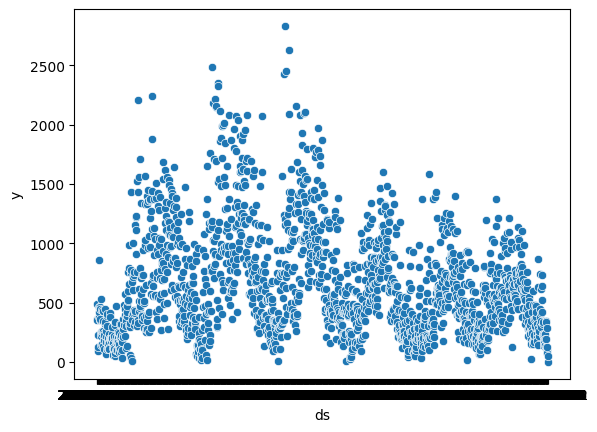

In [49]:
sns.scatterplot(x=df["ds"],y=df["y"])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1734 non-null   object 
 1   y       1734 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.2+ KB


In [99]:
#change ds datatype in df
#df['ds']=pd.to_datetime(df['ds'])

# read holiday csv file 
#df_Holiday= pd.read_csv("raw_data/Holidays.csv", sep=",")

#change ds datatype in df_Holiday
#df_Holiday['ds']=pd.to_datetime(df_Holiday['ds'])

#read inflation rate csv 
#df_Inflation_rate= pd.read_csv("raw_data/Inflation_rate.csv", sep=",")

#change ds datatype in df_Inflation_rate
#df_Inflation_rate['ds']=pd.to_datetime(df_Inflation_rate['ds'])

#merge holiday to df
#merged_df_1 = pd.merge(df, df_Holiday, how='left', left_on='ds', right_on='ds')

#replace nan value with 0 
#merged_df_1['Holiday'] = merged_df_1['Holiday'].fillna(0)

#merge all to df
#merged_Ayham = pd.merge(merged_df_1, df_Inflation_rate, how='left', left_on='ds', right_on='ds')
#merged_Ayham.head()






In [100]:
weather_df = pd.read_csv("../../data/weather.csv")
weather_df = weather_df.drop(columns=["dt","timezone","city_name","lat","lon","sea_level","grnd_level","weather_icon","rain_3h","snow_3h"])
weather_df = weather_df.rename(columns={"dt_iso":"ds"})
weather_df['ds'] = weather_df['ds'].str[:19]
# Convert to datetime format
weather_df["ds"] = pd.to_datetime(weather_df["ds"])
# Drop all rows where the time component of 'column1' is not 12:00:00
weather_df = weather_df[weather_df['ds'].dt.time == pd.to_datetime('12:00:00').time()]
weather_df["ds"] = pd.to_datetime(weather_df["ds"].dt.date)
#df['ds'] = pd.to_datetime(df['ds'])
weather_df


,ds,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
12,2016-09-01,25.90,10000.0,9.28,25.46,25.63,26.03,1019,35,6.70,270,NaN,NaN,NaN,0,800,Clear,sky is clear
36,2016-09-02,22.18,9999.0,10.02,21.65,21.92,23.96,1020,46,4.63,280,NaN,NaN,NaN,75,803,Clouds,broken clouds
60,2016-09-03,24.94,9999.0,10.79,24.56,24.92,25.03,1016,41,6.70,270,NaN,NaN,NaN,40,802,Clouds,scattered clouds
84,2016-09-04,19.94,9999.0,14.96,19.90,19.01,19.96,1010,73,6.70,230,NaN,NaN,NaN,75,500,Rain,light rain
109,2016-09-05,19.94,9999.0,14.96,19.90,19.01,19.96,1014,73,4.63,320,NaN,0.21,NaN,40,500,Rain,light rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56167,2022-11-18,0.14,10000.0,-2.56,-5.18,-0.99,1.73,996,80,5.81,77,10.73,NaN,NaN,100,804,Clouds,overcast clouds
56191,2022-11-19,1.55,10000.0,-2.60,-3.98,0.01,2.77,999,72,7.15,240,8.49,NaN,NaN,20,801,Clouds,few clouds
56217,2022-11-20,0.59,10000.0,-1.59,-3.96,-1.02,1.64,998,84,4.63,220,NaN,NaN,0.14,75,600,Snow,light snow
56243,2022-11-21,-0.56,6000.0,-1.70,-4.67,-1.99,0.55,988,91,3.60,290,NaN,NaN,NaN,100,804,Clouds,overcast clouds


In [101]:
weather_df['weather_id'].unique()


array([800, 803, 802, 500, 801, 520, 300, 701, 804, 501, 741, 310, 600,
       521, 211, 601, 620, 721, 200, 615, 502])

In [102]:
encoded_data = pd.get_dummies(weather_df, columns = ['weather_id'])

merged_data = pd.merge(df, encoded_data, how='left', left_on='ds', right_on='ds')
merged_data

,ds,y,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,weather_id_615,weather_id_620,weather_id_701,weather_id_721,weather_id_741,weather_id_800,weather_id_801,weather_id_802,weather_id_803,weather_id_804
0,2016-09-01,365.9,25.90,10000.0,9.28,25.46,25.63,26.03,1019,35,...,0,0,0,0,0,1,0,0,0,0
1,2016-09-02,358.6,22.18,9999.0,10.02,21.65,21.92,23.96,1020,46,...,0,0,0,0,0,0,0,0,1,0
2,2016-09-03,487.5,24.94,9999.0,10.79,24.56,24.92,25.03,1016,41,...,0,0,0,0,0,0,0,1,0,0
3,2016-09-04,90.9,19.94,9999.0,14.96,19.90,19.01,19.96,1010,73,...,0,0,0,0,0,0,0,0,0,0
4,2016-09-05,125.0,19.94,9999.0,14.96,19.90,19.01,19.96,1014,73,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,2022-11-18,78.5,0.14,10000.0,-2.56,-5.18,-0.99,1.73,996,80,...,0,0,0,0,0,0,0,0,0,1
1763,2022-11-19,287.3,1.55,10000.0,-2.60,-3.98,0.01,2.77,999,72,...,0,0,0,0,0,0,1,0,0,0
1764,2022-11-20,125.8,0.59,10000.0,-1.59,-3.96,-1.02,1.64,998,84,...,0,0,0,0,0,0,0,0,0,0
1765,2022-11-21,1.5,-0.56,6000.0,-1.70,-4.67,-1.99,0.55,988,91,...,0,0,0,0,0,0,0,0,0,1


In [103]:
merged_data.head()


,ds,y,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,weather_id_615,weather_id_620,weather_id_701,weather_id_721,weather_id_741,weather_id_800,weather_id_801,weather_id_802,weather_id_803,weather_id_804
0,2016-09-01,365.9,25.90,10000.0,9.28,25.46,25.63,26.03,1019,35,...,0,0,0,0,0,1,0,0,0,0
1,2016-09-02,358.6,22.18,9999.0,10.02,21.65,21.92,23.96,1020,46,...,0,0,0,0,0,0,0,0,1,0
2,2016-09-03,487.5,24.94,9999.0,10.79,24.56,24.92,25.03,1016,41,...,0,0,0,0,0,0,0,1,0,0
3,2016-09-04,90.9,19.94,9999.0,14.96,19.90,19.01,19.96,1010,73,...,0,0,0,0,0,0,0,0,0,0
4,2016-09-05,125.0,19.94,9999.0,14.96,19.90,19.01,19.96,1014,73,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

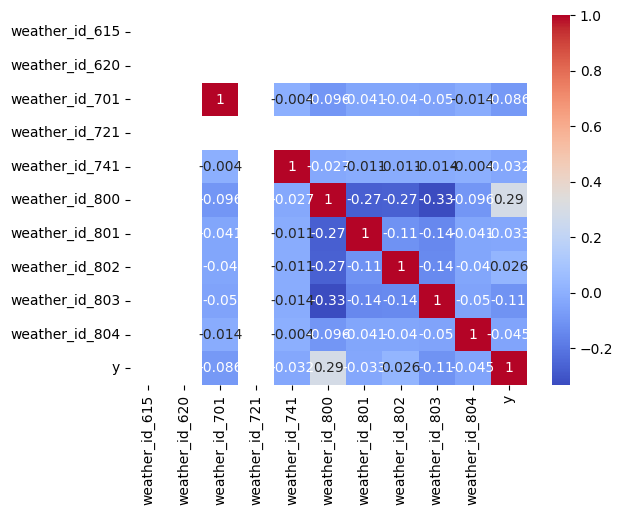

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a DataFrame with the columns you want to calculate the correlation for
data_subset = merged_data[['weather_id_615','weather_id_620','weather_id_701','weather_id_721',
                           'weather_id_741','weather_id_800','weather_id_801','weather_id_802',
                           'weather_id_803','weather_id_804','y']]
                       

# calculate the correlation matrix
corr_matrix = data_subset.corr()

# create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [105]:
corr_matrix["y"].sort_values(ascending=False)


y                 1.000000
weather_id_800    0.291921
weather_id_802    0.026430
weather_id_741   -0.032139
weather_id_801   -0.033404
weather_id_804   -0.045225
weather_id_701   -0.086235
weather_id_803   -0.106351
weather_id_615         NaN
weather_id_620         NaN
weather_id_721         NaN
Name: y, dtype: float64